<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/funnel_chart/grafico_de_funil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRÁFICOS DE FUNIL**

# 1. Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import numpy as np

# 2. Introdução

Gráficos de funil são muito utilizados quando queremos descrever as etapas de um processo [6], como por exemplo, uma compras em uma loja virtual. Existem vários templates para PowerPoint e Google Slides que deixam sua apresentação com um visual bonito mas é necessário copiar os valores de cada etapa um a um para o seu funil. Pesquisamos como os gráficos de funil podem ser feitos utilizando Python, Plotly e Matplotlib para o caso de precisarmos fazer uma apresentação rápida e ainda assim termos gráficos que podem impressionar o público e combinam com o estilo da nossa apresentação. 



# 3.[Plotly] Basic Funnel Chart with graph_objects trace go.Funnel

Com poucas linhas de código temos um gráfico que permite visualizar as diferenças entre as várias etapas de um processo. No caso de Plotly o hover ainda traz as informações de Nome das etapa, o valor, a porcentagem em relação ao início, a porcentagem em relação ao passo anterior e a porcentagem em relação ao total.

In [2]:
# [1]
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"],
    x = [39, 27.4, 20.6, 11, 2]))

fig.show()

# 4. [Plotly] Funnel Chart with graph_objects trace go.Funnel ( **label+ percent initial**)

Com alguma personalização podemos deixar o gráfico mais bonito para colocar numa apresentação. Aqui fizemos o seguinte
- fundo branco,
-  colando os nomes de cada etapa (label) em negrito  e a porcentagem em relação ao valor inicial dentro do funil
- também trocando a cor, por exemplo podemos escolher uma cor que segue o padrão de uma deck de slides. 

In [3]:
from plotly import graph_objects as go

# bold label

labels = ["Website visit", "Downloads", "Potential customers", "Requested price", "Invoice sent"]
labels = ['<b>' + label + '</b>' for label in labels]

fig = go.Figure(go.Funnel(
    y = labels,
    x = [39, 27.4, 20.6, 11, 2],
    textinfo = "label+ percent initial",
    textfont=dict(
            size=36),
    marker = {"color": "#4db6ac"}))

# backgroud white 
fig.update_layout(plot_bgcolor="white")

# Update axes properties
# x 
fig.update_xaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False
    )
# y   
fig.update_yaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False
    )

fig.show()

# 5. [Plotly] Funnel Chart with graph_objects trace go.Funnel ( **value + percent previous**)

Outra forma de personalizar o gráfico de funil do Plotly.
- fundo branco,
-  valores e porcentagens em relação ao estágio anterior dentro do funil
- labels em bold
- cor
- tamanho da figura



In [4]:
# [1,2]
from plotly import graph_objects as go

# bold label
labels = ["Website visit", "Downloads", "Potential customers", "Requested price", "Invoice sent"]
labels = ['<b>' + label + '</b>' for label in labels]

fig = go.Figure(go.Funnel(
    y = labels,
    x = [39, 27.4, 20.6, 11, 2],
    textinfo = "value + percent previous",
    textfont=dict(size=36),
    marker = {"color": "#ef6c00"})
)

# backgroud white 
fig.update_layout(
    title={
        'text': '<b>' + 'Plot Title' + '<b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        plot_bgcolor="white",
        font=dict(size=18)
        )

# fig_size
fig.update_layout(
    autosize=False,
    width=1000,
    height=500
    
)

fig.show()

# 6. [Plotly] Stacked Funnel Plot with go.Funnel

Não há nenhuma complicação quando queremos um funil para comparar dois grupos.
É só utilizar ```fig.add_trace``` duas vezes, uma para cada grupo. Se tiver mais grupos é só adicionando as informações com ```fig.add_trace``` quantas vezes forem necessárias. Nesse casos as vezes pode ficar difícil de ver a informação na figura estática, mas as informações do hover continuam acessíveis.

In [5]:
#[1]
from plotly import graph_objects as go

# bold label

labels = ["Website visit", "Downloads", "Potential customers", "Requested price", "Invoice sent"]
labels = ['<b>' + label + '</b>' for label in labels]

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Montreal',
    y = labels,
    x = [120, 60, 30, 20,5],
    textinfo = "value+percent previous",
    textfont=dict(size=36),
    marker = {"color": "red"}))

fig.add_trace(go.Funnel(
    name = 'Toronto',
    orientation = "h",
    y = labels,
    x = [100, 60, 40, 30, 20],
    textinfo = "value+percent previous",
    textfont=dict(size=36),
    marker = {"color": "cyan"}))

# backgroud white 
fig.update_layout(
        title={
        'text': '<b>' + 'Plot Title' + '<b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        plot_bgcolor="white",
        font=dict(size=18)
    )

fig.show()

## [Plotly Funnel] Informações dentro do funil

São controladas pelo parametro **textinfo**.


```
The 'textinfo' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['label', 'text', 'percent initial', 'percent previous', 'percent total', 'value'] joined with '+' characters
        (e.g. 'label+text')
        OR exactly one of ['none'] (e.g. 'none')
```



 # 7. [Matplotlib] Bidirectional Bar Chart 
 
 Gráfico feito com base na referência [3], com apenas algumas alterações. Visualmente é bonito mas se quisermos a informação precisa do valor de cada barra não é tão fácil de ver.

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


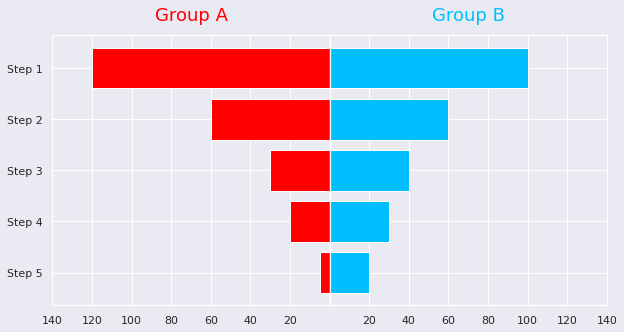

In [6]:
labels = ["Step 1", "Step 2", "Step 3", "Step 4", "Step 5"]
x1 = [120, 60, 30, 20, 5]
x2 = [100, 60, 40, 30, 20]

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_1 = 'red'
color_2 = 'deepskyblue'
index = labels
column0 = x1
column1 = x2
title0 = 'Group A'
title1 = 'Group B'

sns.set()


fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_1)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_1, **hfont)
axes[1].barh(index, column1, align='center', color=color_2)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_2, **hfont)

plt.gca().invert_yaxis()
axes[0].invert_xaxis()

axes[0].set_xticks([20, 40, 60, 80, 100, 120, 140])
axes[0].set_xticklabels([20, 40, 60, 80, 100, 120, 140])
axes[1].set_xticks([20, 40, 60, 80, 100, 120, 140])
axes[1].set_xticklabels([20, 40, 60, 80, 100, 120, 140])


plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

# Reset matplotlib parameters

É necessário porque utilizamos sns.set().

In [7]:

mpl.rcParams.update(mpl.rcParamsDefault)


#  8. [Matplotlib] Bidirectional Bar Chart - Values
Foi elaborado com algumas modificações no código do gráfico da seção 7

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


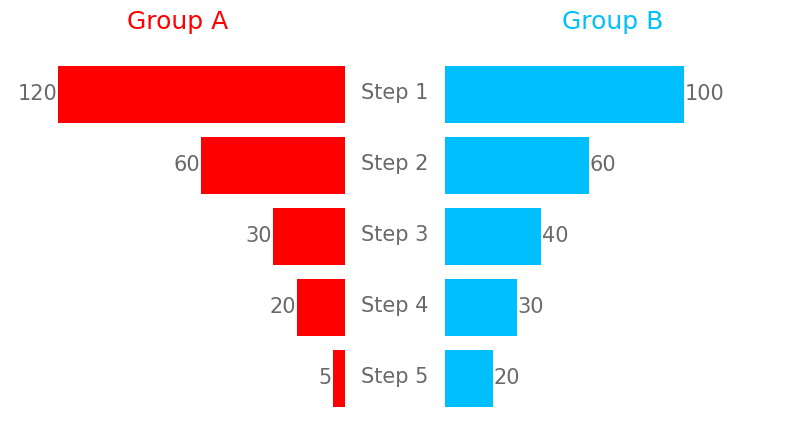

In [8]:
# referência [3]

labels = ["Step 1", "Step 2", "Step 3", "Step 4", "Step 5"]
x1 = [120, 60, 30, 20, 5]
x2 = [100, 60, 40, 30, 20]

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_1 = 'red'
color_2 = 'deepskyblue'
index = labels
column0 = x1
column1 = x2
title0 = 'Group A'
title1 = 'Group B'


fig, axes = plt.subplots(figsize=(10,5), ncols=3, sharey=True, gridspec_kw={'width_ratios': [10, 3, 10]})
# space for labels in the middle: gridspec_kw={'width_ratios': [10, 3, 10]}

fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_1)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_1, **hfont)
axes[2].barh(index, column1, align='center', color=color_2)
axes[2].set_title(title1, fontsize=18, pad=15, color=color_2, **hfont)

plt.gca().invert_yaxis()

axes[0].set_xlim([140,0])
axes[2].set_xlim([0, 140])


# set individual bar labels
for i,j in zip(axes[2].patches, range(len(labels))):
  # get_width pulls left or right; get_y pushes up or down
  axes[1].text(0.5,
               i.get_y()+.45,
               labels[j], 
               fontsize=15,
               color='dimgrey',
               horizontalalignment = 'center')

# axis off
for i in range(0,3):
  axes[i].axis('off')

# set individual bar labels
for i in axes[0].patches:
  # get_width pulls left or right; get_y pushes up or down
  axes[0].text(i.get_width()+.3, 
               i.get_y()+.38,
               i.get_width(),
               fontsize=15,
               color='dimgrey',
               verticalalignment='center',
               horizontalalignment = 'right')
    
# set individual bar labels
for i in axes[2].patches:
  # get_width pulls left or right; get_y pushes up or down
  axes[2].text(i.get_width()+.3,
               i.get_y()+.38,
               i.get_width(),
               fontsize=15,
               color='dimgrey',
               verticalalignment='center',
               horizontalalignment = 'left')


plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

# 9. [Matplotlib] Bidirectional Bar Chart - Subtitles, Values + Percentages

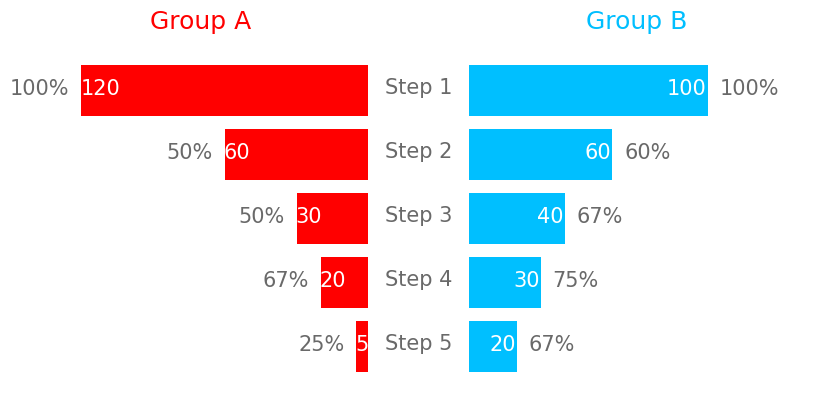

In [9]:
# referência [3]

labels = ["Step 1", "Step 2", "Step 3", "Step 4", "Step 5"]
x1 = [120, 60, 30, 20, 5]
x2 = [100, 60, 40, 30, 20]

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_1 = 'red'
color_2 = 'deepskyblue'
index = labels
column0 = x1
column1 = x2
title0 = 'Group A'
title1 = 'Group B'

fig, axes = plt.subplots(figsize=(10,4.5), ncols=3, sharey=True, gridspec_kw={'width_ratios': [10, 3, 10]})
# a subplot for labels in the middle: gridspec_kw={'width_ratios': [10, 3, 10]}

fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_1)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_1, **hfont)
axes[2].barh(index, column1, align='center', color=color_2)
axes[2].set_title(title1, fontsize=18, pad=15, color=color_2, **hfont)

plt.gca().invert_yaxis()

axes[0].set_xlim([140,0])
axes[2].set_xlim([0, 140])


# set individual bar lables using above list
for i,j in zip(axes[2].patches, range(len(labels))):
  # get_width pulls left or right; get_y pushes up or down
  axes[1].text(0.5,
               i.get_y()+.45,
               labels[j], 
               fontsize=15,
               color='dimgrey',
               horizontalalignment = 'center')

# axis off
for i in range(0,3):
  axes[i].axis('off')

# set individual bar labels
for i in axes[0].patches:
  # get_width pulls left or right; get_y pushes up or down
  axes[0].text(i.get_width()+.4,
               i.get_y()+.38,
               i.get_width(),
               fontsize=15,
               color='white',
               verticalalignment='center',
               horizontalalignment = 'left')
    
# set individual bar labels
for i in axes[2].patches:
  # get_width pulls left or right; get_y pushes up or down
  axes[2].text(i.get_width()-0.45, 
               i.get_y()+.38,
               i.get_width(), 
               fontsize=15,
               color='white',
               verticalalignment='center',
               horizontalalignment = 'right')
    
# percentagem from previous

# percentages - subplot0
count_steps = len(column0)
perc0 = [1]
for i in range(1,len(column0)):
  perc0.append(column0[i]/column0[i-1])


for i,j in zip(axes[0].patches, range(len(labels))):
  # get_width pulls left or right; get_y pushes up or down
  axes[0].text(i.get_width()+5,
               i.get_y()+.38,
               "{:.0%}".format(perc0[j]), 
               fontsize=15,
               color='dimgrey',
               verticalalignment='center',
               horizontalalignment = 'right')
    
# percentages - subplot1
count_steps = len(column1)
perc1 = [1]
for i in range(1,len(column1)):
  perc1.append(column1[i]/column1[i-1])

    
# set individual bar labels
for i,j in zip(axes[2].patches, range(len(labels))):
  # get_width pulls left or right; get_y pushes up or down
  axes[2].text(i.get_width()+5,
               i.get_y()+.38,
               "{:.0%}".format(perc1[j]), 
               fontsize=15,
               color='dimgrey',
               verticalalignment='center',
               horizontalalignment = 'left')


plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

# 10. [Matplotlib] Bidirectional Bar Chart - Legend, Values + Percentages with border

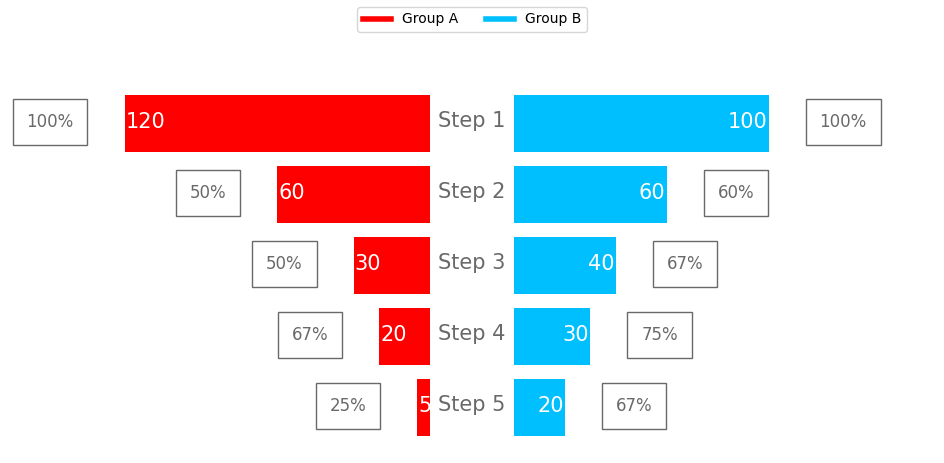

In [10]:
labels = ["Step 1", "Step 2", "Step 3", "Step 4", "Step 5"]
x1 = [120, 60, 30, 20, 5]
x2 = [100, 60, 40, 30, 20]

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_1 = 'red'
color_2 = 'deepskyblue'
index = labels
column0 = x1
column1 = x2
title0 = 'Group A'
title1 = 'Group B'

fig, axes = plt.subplots(figsize=(12,5), ncols=3, sharey=True, gridspec_kw={'width_ratios': [10, 2, 10]})
# space for labels in the middle: gridspec_kw={'width_ratios': [10, 3, 10]}

fig.tight_layout()

# barh
axes[0].barh(index, column0, align='center', color=color_1)
axes[2].barh(index, column1, align='center', color=color_2)

# To show data from highest to lowest
plt.gca().invert_yaxis()


# Set the x-axis view limits
axes[0].set_xlim([165,0])
axes[2].set_xlim([0, 165])


# step names
for i,j in zip(axes[2].patches, range(len(labels))):
  axes[1].text(0.5, i.get_y()+.45,
               labels[j],
               fontsize=15,
               color='dimgrey',
               horizontalalignment = 'center')

# axis off
for i in range(0,3):
  axes[i].axis('off')

# set individual bar labels - subplot0
for i in axes[0].patches:
  # get_width pulls left or right; get_y pushes up or down
  axes[0].text(i.get_width()-.45,
               i.get_y()+.38,
               i.get_width(),
               fontsize=15,
               color='white',
               verticalalignment='center',
               horizontalalignment = 'left')
    
# set individual bar labels - subplot1
for i in axes[2].patches:
  # get_width pulls left or right; get_y pushes up or down
  axes[2].text(i.get_width()-0.45,
               i.get_y()+.38,
               i.get_width(),
               fontsize=15,
               color='white',
               verticalalignment='center',
               horizontalalignment = 'right')
    
# percentagem from previous

# percentages - subplot0
count_steps = len(column0)
perc0 = [1]
for i in range(1,len(column0)):
  perc0.append(column0[i]/column0[i-1])


for i,j in zip(axes[0].patches, range(len(labels))):
  # get_width pulls left or right; get_y pushes up or down
  axes[0].text(i.get_width()+20,
               i.get_y()+.38,
               "{:.0%}".format(perc0[j]),
               fontsize=12,
               color='dimgrey',
               verticalalignment='center',
               horizontalalignment = 'right',
               bbox=dict(facecolor='none',
                         edgecolor='dimgray',
                         pad=10))
    
# percentages - subplot1
count_steps = len(column1)
perc1 = [1]
for i in range(1,len(column1)):
  perc1.append(column1[i]/column1[i-1])

# set individual bar lables using above list
for i,j in zip(axes[2].patches, range(len(labels))):
  # get_width pulls left or right; get_y pushes up or down
  axes[2].text(i.get_width()+20,
               i.get_y()+.38,
               "{:.0%}".format(perc1[j]), 
               fontsize=12,
               color='dimgrey',
               verticalalignment='center',
               horizontalalignment = 'left',
               bbox=dict(facecolor='none', 
                         edgecolor='dimgray', 
                         pad=10))

# legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=color_1, lw=4),
                Line2D([0], [0], color=color_2, lw=4)]

fig.legend(custom_lines, [title0, title1], ncol=2, loc = "upper center")

# Adjust the subplot layout parameters
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

# 11. [Matplotlib] Bidirectional Bar Chart - Legend, Values + Percentages with border, unweighted

Algumas vezes quanto temos porcentagens muito pequenas no final do funil, pode ficar difícil de ver os valores, então com funil com a forma fixa, não ponderada, teremos a formato do funil, teremos todas as informações sobre valores, mas perdemos a informação visual sobre o tamanho das barras. Isso pode ser resolvido afastando as caixinhas com a porcentagem do gráfico e introduzindo o local do texto com os valores de forma condicional ao tamanho da barra. Um exemplo de como isso é feito pode ser encontrado [aqui](https://matplotlib.org/stable/gallery/statistics/barchart_demo.html).

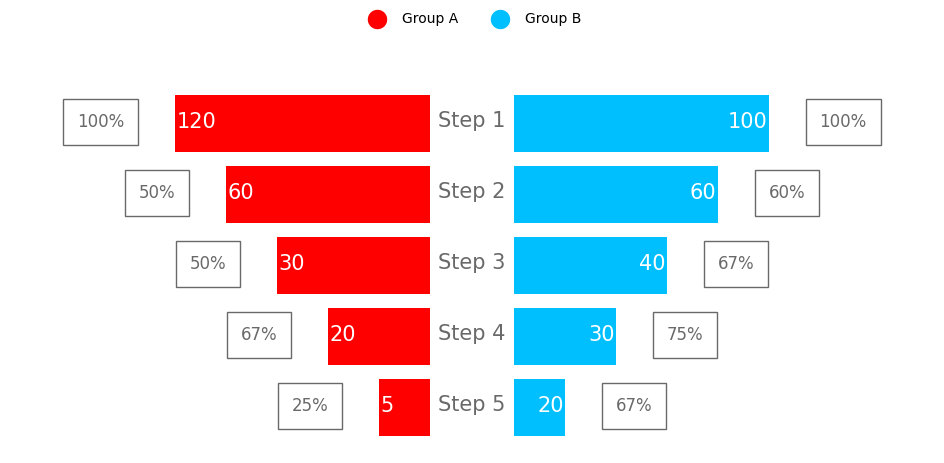

In [11]:
labels = ["Step 1", "Step 2", "Step 3", "Step 4", "Step 5"]
x1 = [120, 60, 30, 20, 5]
x2 = [100, 60, 40, 30, 20]

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_1 = 'red'
color_2 = 'deepskyblue'
index = labels
column0 = x1
column1 = x2
title0 = 'Group A'
title1 = 'Group B'

fig, axes = plt.subplots(figsize=(12,5), ncols=3, sharey=True, gridspec_kw={'width_ratios': [10, 2, 10]})
# space for labels in the middle: gridspec_kw={'width_ratios': [10, 3, 10]}

fig.tight_layout()


bar_width = [100, 80, 60, 40, 20]

# barh
axes[0].barh(index, bar_width, align='center', color=color_1)
axes[2].barh(index, bar_width, align='center', color=color_2)

# To show data from highest to lowest
plt.gca().invert_yaxis()


# Set the x-axis view limits
axes[0].set_xlim([165,0])
axes[2].set_xlim([0, 165])


# step names
for i,j in zip(axes[2].patches, range(len(labels))):
  axes[1].text(0.5, i.get_y()+.45,
               labels[j],
               fontsize=15,
               color='dimgrey',
               horizontalalignment = 'center')

# axis off
for i in range(0,3):
  axes[i].axis('off')

# set individual bar labels - subplot0
for i,j in zip(axes[0].patches, range(len(labels))):
  # get_width pulls left or right; get_y pushes up or down
  axes[0].text(i.get_width()-.45,
               i.get_y()+.38,
               column0[j],
               fontsize=15,
               color='white',
               verticalalignment='center',
               horizontalalignment = 'left')
    
# set individual bar labels - subplot1
for i,j in zip(axes[2].patches, range(len(labels))):
  # get_width pulls left or right; get_y pushes up or down
  axes[2].text(i.get_width()-0.45, i.get_y()+.38,
               column1[j],
               fontsize=15,
               color='white',
               verticalalignment='center',
               horizontalalignment = 'right')
    
# percentagem from previous

# percentages - subplot0
count_steps = len(column0)
perc0 = [1]
for i in range(1,len(column0)):
  perc0.append(column0[i]/column0[i-1])


for i,j in zip(axes[0].patches, range(len(labels))):
  # get_width pulls left or right; get_y pushes up or down
  axes[0].text(i.get_width()+20, i.get_y()+.38,
               "{:.0%}".format(perc0[j]),
               fontsize=12,
               color='dimgrey',
               verticalalignment='center',
               horizontalalignment = 'right',
               bbox=dict(facecolor='none',
                         edgecolor='dimgray',
                         pad=10))
    
# percentages - subplot1
count_steps = len(column1)
perc1 = [1]
for i in range(1,len(column1)):
  perc1.append(column1[i]/column1[i-1])

# set individual bar lables using above list
for i,j in zip(axes[2].patches, range(len(labels))):
  # get_width pulls left or right; get_y pushes up or down
  axes[2].text(i.get_width()+20,
               i.get_y()+.38,
               "{:.0%}".format(perc1[j]), 
               fontsize=12,
               color='dimgrey',
               verticalalignment='center',
               horizontalalignment = 'left',
               bbox=dict(facecolor='none', 
                         edgecolor='dimgray', 
                         pad=10))

# legend
from matplotlib.lines import Line2D
# custom_lines = [Line2D([0], [0], color=color_1, lw=4),
#                 Line2D([0], [0], color=color_2, lw=4)]

custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_1, markersize=15),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=color_2, markersize=15)]

fig.legend(custom_lines,
           [title0, title1], 
           ncol=2, 
           loc = "upper center",
           frameon=False)

# Adjust the subplot layout parameters
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

## 12. [Matplotlib] Funnel chart kind Plotly

Utilizando o Matplotlib também é possível fazer um gráfico de funil bem paracido com o do Plotly na seção 3.

Mostramos abaixo um exemplo da referência [4], no qual trocamos a fonte dos labels para bold. 

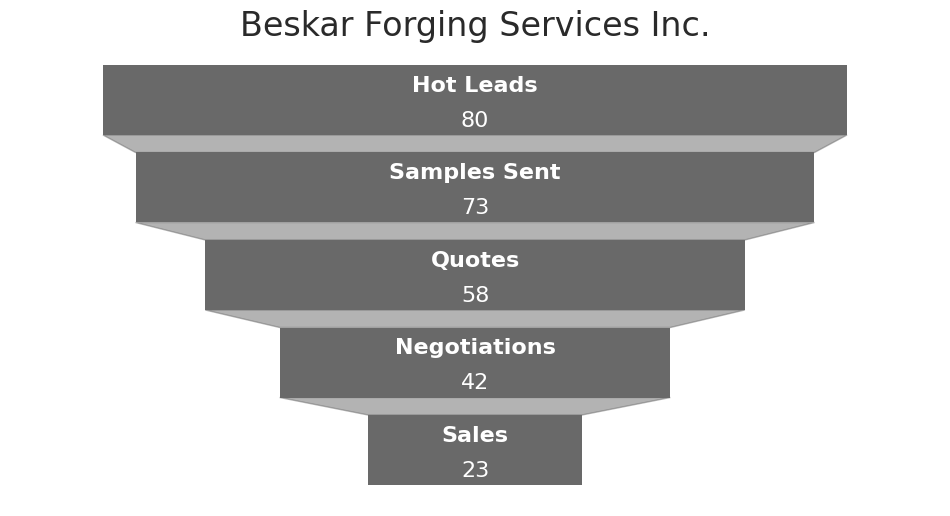

In [12]:
from matplotlib import font_manager as fm
# funnel chart
y = [5,4,3,2,1]
x = [80,73,58,42,23]
labels = ['Hot Leads', 'Samples Sent', 'Quotes', 'Negotiations', 'Sales']
x_max = 100
x_min = 0
x_range = x_max - x_min

fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in enumerate(x):
    left = (x_range - val)/2
    plt.barh(y[idx],
             x[idx],
             left = left, 
             color='dimgray',
             height=.8)
    # label
    plt.text(50, 
             y[idx]+0.1,
             labels[idx],
             ha='center',
             fontsize=16,
             color='white' 
             ,weight='bold')
    # value
    plt.text(50,
             y[idx]-0.3,
             x[idx], 
             ha='center',
             fontsize=16,
             color='white')
    
    if idx != len(x)-1:
        next_left = (x_range - x[idx+1])/2
        shadow_x = [left, next_left, 
                    100-next_left, 100-left, left]
        
        shadow_y = [y[idx]-0.4, y[idx+1]+0.4, 
                    y[idx+1]+0.4, y[idx]-0.4, y[idx]-0.4]
        plt.fill(shadow_x, shadow_y, color='dimgray', alpha=0.5)
plt.xlim(x_min, x_max)
plt.axis('off')
plt.title('Beskar Forging Services Inc.', loc='center', fontsize=24, color='#2A2A2A')
plt.show()

# 13. [Matplotlib] Funnel chart unweighted

Podemos trocar as cores, o que dá um visual bem diferente

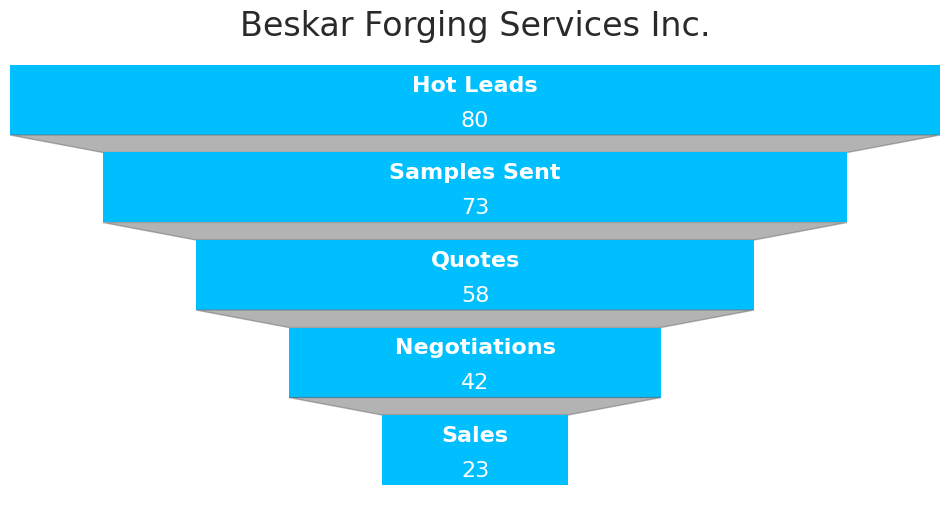

In [13]:
# funnel chart unweighted

# to create funel
y = [5,4,3,2,1]
x = [100,80,60,40,20]

# labels and value
labels = ['Hot Leads', 'Samples Sent', 'Quotes', 'Negotiations', 'Sales']
values = [80,73,58,42,23]


x_max = 100
x_min = 0
x_range = x_max - x_min

fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in enumerate(x):
    left = (x_range - val)/2
    plt.barh(y[idx], x[idx], left = left, 
             color='deepskyblue', height=.8)
    # label
    plt.text(50, y[idx]+0.1, labels[idx], ha='center',
             fontsize=16, color='white' ,weight='bold')
    # value
    plt.text(50, y[idx]-0.3, values[idx], ha='center',
              fontsize=16, color='white')
    
    if idx != len(x)-1:
        next_left = (x_range - x[idx+1])/2
        shadow_x = [left, next_left, 
                    100-next_left, 100-left, left]
        
        shadow_y = [y[idx]-0.4, y[idx+1]+0.4, 
                    y[idx+1]+0.4, y[idx]-0.4, y[idx]-0.4]
        plt.fill(shadow_x, shadow_y, color='dimgray', alpha=0.5)
plt.xlim(x_min, x_max)
plt.axis('off')
plt.title('Beskar Forging Services Inc.', loc='center', fontsize=24, color='#2A2A2A')
plt.show()

# 14. [Matplotlib] Funnel chart unweighted - Values + Percentage from Previous

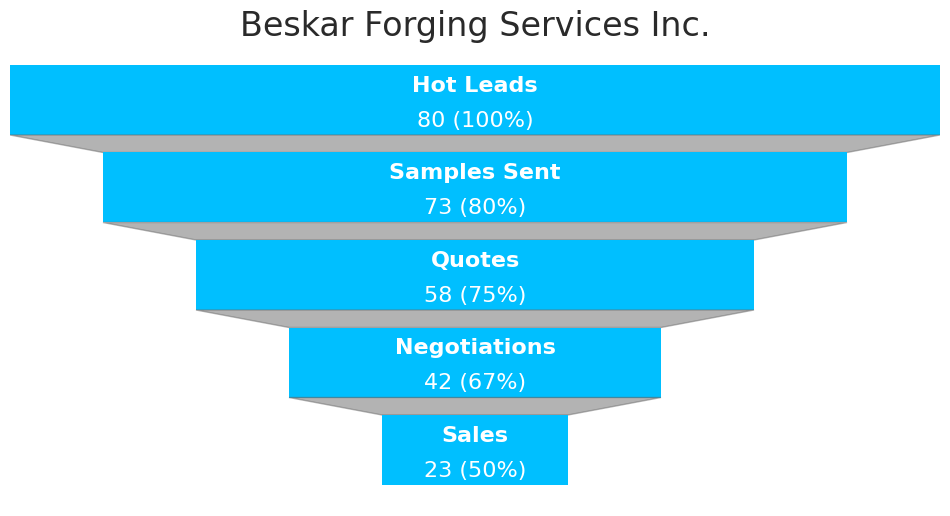

In [14]:
# funnel chart unweighted

# to create funel
y = [5,4,3,2,1]
x = [100,80,60,40,20]

# labels and value
labels = ['Hot Leads', 'Samples Sent', 'Quotes', 'Negotiations', 'Sales']
values = [80,73,58,42,23]

# percentages
count_steps = len(labels)
perc = [1]
for i in range(1,count_steps):
  perc.append(x[i]/x[i-1])


x_max = 100
x_min = 0
x_range = x_max - x_min

fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in enumerate(x):
    left = (x_range - val)/2
    plt.barh(y[idx], x[idx], left = left, 
             color='deepskyblue', height=.8)
    # label
    plt.text(50, y[idx]+0.1, labels[idx], ha='center',
             fontsize=16, color='white' ,weight='bold')
    # value
    plt.text(50, y[idx]-0.3, '{0} ({1:.0%})'.format(values[idx],perc[idx]) , ha='center',
              fontsize=16, color='white')
    
    if idx != len(x)-1:
        next_left = (x_range - x[idx+1])/2
        shadow_x = [left, next_left, 
                    100-next_left, 100-left, left]
        
        shadow_y = [y[idx]-0.4, y[idx+1]+0.4, 
                    y[idx+1]+0.4, y[idx]-0.4, y[idx]-0.4]
        plt.fill(shadow_x, shadow_y, color='dimgray', alpha=0.5)
plt.xlim(x_min, x_max)
plt.axis('off')
plt.title('Beskar Forging Services Inc.', loc='center', fontsize=24, color='#2A2A2A')
plt.show()




# 15. [Matplotlib] Funnel chart - Lines, Labels + Values as index

Fizemos algumas alterações na função da referência [5]. É possível passar por parâmetro quais valores deseja mostrar no funil. As cores podem ser passadas em uma lista, no meio da função, ou utilizar 

```plt.get_cmap(sns.light_palette('#4db6ac', reverse=True, as_cmap=True))```

acima '#4db6ac' é a cor, que pode ser passado como hex, por nome, rgb não foi testada. Também pode utilizar dark_palette. reverse faz o padrão de cores começar do mais claro para o mais escuro e vice-versa.

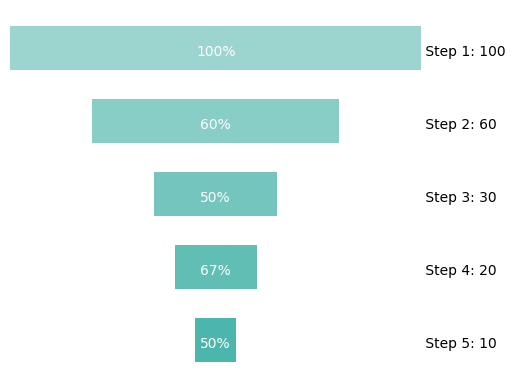

In [15]:
# [5]

labels = ["Step 1", "Step 2", "Step 3", "Step 4", "Step 5"]
x = [100, 60, 30, 20, 10]

funnel_df = pd.DataFrame({'step':labels,'val':x})


# Function: funnel_chart, creates a funnel chart image from a dataframe of steps
# Inputs: (1) dataframe with 2 columns. The first is the "step", and the second is the "val" corresponding to each step. (2) Optional boolean parameter show_n (displays the n size of each step). (3) Optional paramater show_pct which allows the user to show each step of the funnel as a percent of the original n size ('of whole') or a percent or the previous step ('of last step')
# Output: matplotlib image representing a funnel chart
def funnel_chart(df, show_n=True,show_pct='NA'):
  #set up data frame
  df['val']=df['val'].astype(int)
  my_max=df['val'].max()
  df = df.sort_values('val',ascending=False).reset_index(drop=True)
  df['pct_of_whole']=round((df['val']/my_max)*100).astype(int)
  pct_change=[100]
  for j in range(1,len(df['val'])):
    pct_change.append(int(round(df['val'][j]/df['val'][j-1]*100)))
  df['pct_change']=pct_change
  df = df.sort_values('val').reset_index(drop=True)
  df['left']=(my_max-df['val'])/2
      
  # colors 
  step_colors = plt.get_cmap(sns.light_palette('#4db6ac', reverse=True, as_cmap=True))(
        np.linspace(0, 0.5, count_steps))
  # you can also pass a color list, size of list should be bigger or equal than number os stesp
  #step_colors = ['indigo','purple','darkviolet','DarkOrchid','MediumOrchid','orchid','plum','thistle']


  #initialize plot
  fig, ax = plt.subplots()
  for i in range(len(df['step'])):
    #ax.barh(0.5*i+0.5, df['val'][i], height=0.3, left=df['left'][i], align='center', color=df['col'][i],alpha = 1.0, label=df['step'][i])
    ax.barh(0.5*i+0.5, df['val'][i], height=0.3, left=df['left'][i], align='center', color=step_colors[i],alpha = 1.0, label=df['step'][i])
    if(show_n==True):
      ax.annotate(' ' + df['step'][i] + ': ' + str(df['val'][i]),xy=(my_max,0.5*i+0.45),horizontalalignment='left')
    else:
      ax.annotate(' ' + df['step'][i],xy=(my_max,0.5*i+0.45),horizontalalignment='left')
    if(show_pct=='of whole'):
      ax.annotate(str(df['pct_of_whole'][i]) + '%' ,xy=(my_max/2,0.5*i+0.45),horizontalalignment='center',color='white')
    elif(show_pct=='of last step'):
      ax.annotate(str(df['pct_change'][i]) + '%' ,xy=(my_max/2,0.5*i+0.45),horizontalalignment='center',color='white')


  #remove border and align chart
  ax.axis('off')
  fig.subplots_adjust(right=0.8)

  return

funnel_chart(funnel_df, show_n=True,show_pct='of last step')

# 16. [Matplotlib] Funnel chart - Lines, Labels, Values and Percentage, unweighted - from dark to light color

O exemplo abaixo foi construído alterando o da seção 13. Foi retirada a parte do código com shadow. Também modoficamos a forma de passar as cores.

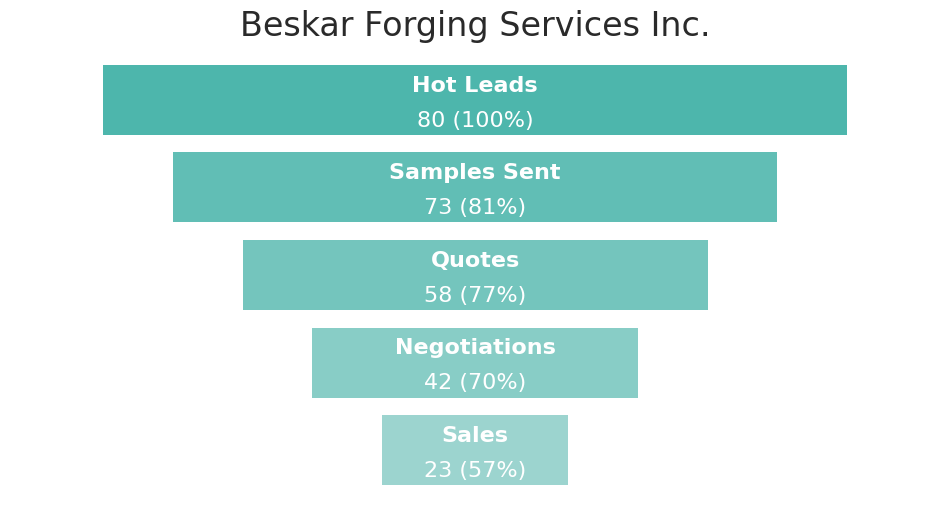

In [16]:
# funnel chart with a fixed shape

# to create funel
y = [5,4,3,2,1]
x = [80,65,50,35,20]


# labels and value
labels = ['Hot Leads', 'Samples Sent', 'Quotes', 'Negotiations', 'Sales']
values = [80,73,58,42,23]

# percentages
count_steps = len(labels)
perc = [1]
for i in range(1,count_steps):
  perc.append(x[i]/x[i-1])


x_max = 100
x_min = 0
x_range = x_max - x_min

# colors 
step_colors = plt.get_cmap(sns.light_palette('#4db6ac', reverse=True, as_cmap=True))(
        np.linspace(0, 0.5, count_steps))

fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in enumerate(x):
    left = (x_range - val)/2
    grafico = plt.barh(y[idx], x[idx], left = left, 
              height=.8,color = step_colors[idx])
    # label
    plt.text(50, y[idx]+0.1, labels[idx], ha='center',
             fontsize=16, color='white' ,weight='bold')
    # value
    plt.text(50, y[idx]-0.3, '{0} ({1:.0%})'.format(values[idx],perc[idx]) , ha='center',
              fontsize=16, color='white')
    
plt.xlim(x_min, x_max)
plt.axis('off')
plt.title('Beskar Forging Services Inc.', loc='center', fontsize=24, color='#2A2A2A')
plt.show()

# 17.  [Matplotlib] Funnel chart - Lines, Labels, Values and Percentage, unweighted - from light to dark color

O exemplo abaixo foi construído alterando o da seção 13. Foi retirada a parte do código com shadow. Também modoficamos a forma de passar as cores.

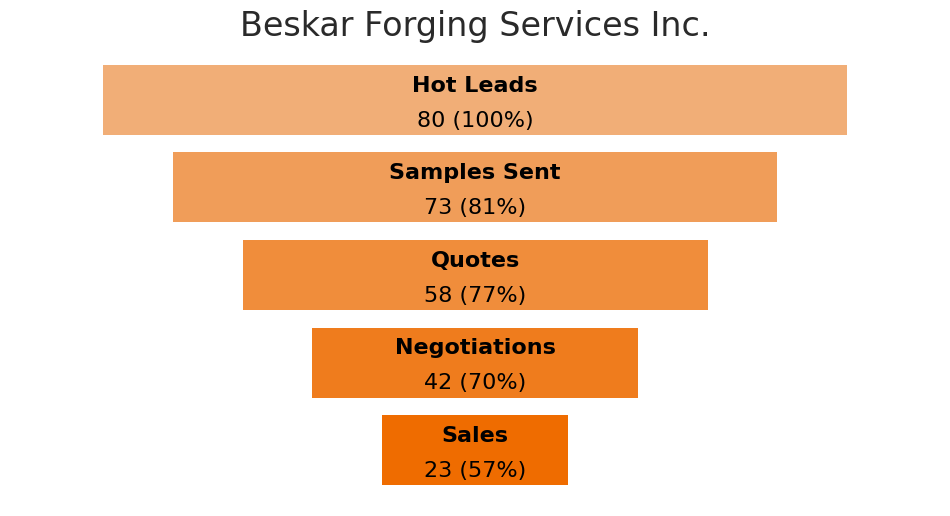

In [17]:
# funnel chart with a fixed shape

# to create funel
y = [5,4,3,2,1]
x = [80,65,50,35,20]

# labels and value
labels = ['Hot Leads', 'Samples Sent', 'Quotes', 'Negotiations', 'Sales']
values = [80,73,58,42,23]

# percentages
count_steps = len(labels)
perc = [1]
for i in range(1,count_steps):
  perc.append(x[i]/x[i-1])


x_max = 100
x_min = 0
x_range = x_max - x_min

# colors 
step_colors = plt.get_cmap(sns.light_palette('#ef6c00', reverse=False, as_cmap=True))(
        np.linspace(0.5, 1, count_steps))

fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in enumerate(x):
    left = (x_range - val)/2
    grafico = plt.barh(y[idx], x[idx], left = left, 
              height=.8,color = step_colors[idx])
    # label
    plt.text(50, y[idx]+0.1, labels[idx], ha='center',
             fontsize=16, color='black' ,weight='bold')
    # value
    plt.text(50, y[idx]-0.3, '{0} ({1:.0%})'.format(values[idx],perc[idx]) , ha='center',
              fontsize=16, color='black')
    
  
plt.xlim(x_min, x_max)
plt.axis('off')
plt.title('Beskar Forging Services Inc.', loc='center', fontsize=24, color='#2A2A2A')
plt.show()

# 18. Referências

[1] https://plotly.com/python/funnel-charts/

[2] https://plotly.com/python/figure-labels/

[3] https://sharkcoder.com/data-visualization/mpl-bidirectional

[4] https://towardsdatascience.com/funnel-charts-with-python-1ef1a2b183ab

[5] https://support.sisense.com/kb/en/article/funnel-charts-in-python

[6] https://support.microsoft.com/pt-br/office/criar-um-gr%C3%A1fico-de-funil-ba21bcba-f325-4d9f-93df-97074589a70e

